In [130]:
#To use the numpy and pandas functions
import numpy as np
import pandas as pd

#For visualisation
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier,XGBRFClassifier


#For data Scalling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE

#For Model Evaluation
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix,accuracy_score,classification_report,auc,roc_curve

#For ignore the Warnings
import warnings
warnings.filterwarnings("ignore")

#For making Pickle and Json Files
import pickle
import json
import time

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA (Exploratory Data Analysis)

In [3]:
df.head() # It will print by default first 5 records
df.head(10) #It will print first 10 records

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.tail() # It will print by default last 5 records
df.head(10) #It will print last 10 records

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.shape # Display shape of dataset with rows and columns

(891, 12)

In [6]:
df.info() #prints information about the Dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum() #Print null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.nunique() #returns the number of unique values for each column

PassengerId    891
Survived         2
Pclass           3
Name           891
Gender           2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
df.describe() #print statistical information for only numeric columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.dtypes #print the data type of every column

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df["Name"].nunique() # All values are unique

891

In [12]:
df["Ticket"].nunique() # max values are unique out of 891 rows

681

In [13]:
df["Cabin"].value_counts() # returns counts of unique values

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [14]:
df["Embarked"].value_counts().to_dict() # returns counts of unique values in dictionary

{'S': 644, 'C': 168, 'Q': 77}

<AxesSubplot:xlabel='Embarked', ylabel='count'>

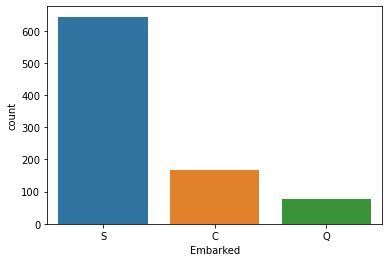

In [15]:
sns.countplot(x=df["Embarked"])

In [16]:
df["Embarked"].isna().sum() 

2

In [17]:
df["Embarked"].mode()

0    S
dtype: object

In [18]:
df["Embarked"].fillna("S",inplace = True) # 2 null values filled with df["Embarked"].mode()

In [19]:
df["Embarked"].isna().sum()

0

In [20]:
df["Embarked"].replace({'S':0, 'C':1, 'Q':2},inplace=True) #datatype changed object to numeric by label encoding

In [21]:
df["Embarked"].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [22]:
df["Age"].fillna(df["Age"].mean(),inplace=True) #null values filled with colums mean()

In [23]:
df["Age"].isna().sum()

0

In [24]:
df['Gender'].value_counts().to_dict()

{'male': 577, 'female': 314}

In [25]:
df['Gender'].replace({'male':0, 'female':1},inplace=True)  #datatype changed object to numeric by label encoding

In [26]:
df['Gender'].value_counts()

0    577
1    314
Name: Gender, dtype: int64

In [27]:
column_list = ["PassengerId","Name","Ticket","Cabin"] #colums droped bcz it contains max unique values and null values
df.drop(column_list,axis=1,inplace=True)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


### Checking Outliers


<AxesSubplot:xlabel='Pclass'>

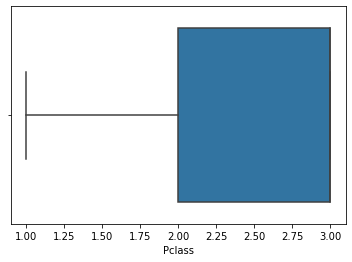

In [29]:
sns.boxplot(df["Pclass"])

<AxesSubplot:xlabel='Gender'>

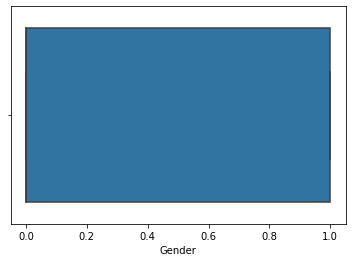

In [30]:
sns.boxplot(df["Gender"])

<AxesSubplot:xlabel='Age'>

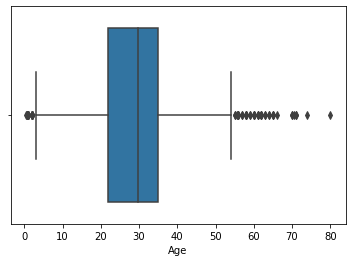

In [31]:
sns.boxplot(df["Age"])

<AxesSubplot:xlabel='Age'>

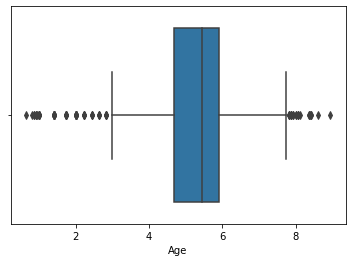

In [32]:
sns.boxplot(np.sqrt(df["Age"]))

In [33]:
df["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

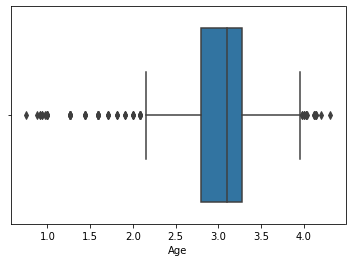

In [34]:
sns.boxplot(np.cbrt(df["Age"]))

<AxesSubplot:xlabel='Age'>

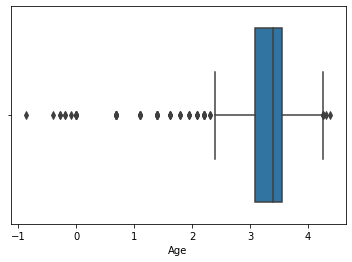

In [35]:
sns.boxplot(np.log(df["Age"]))

<AxesSubplot:xlabel='SibSp'>

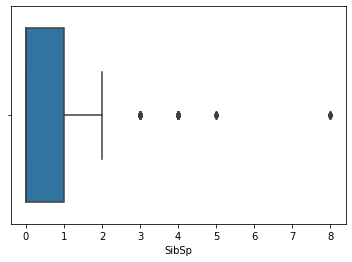

In [36]:
sns.boxplot(df["SibSp"])

In [37]:
from scipy.stats import zscore

In [38]:
z_score_values = np.abs(zscore(df['Age']))
outliers_index = np.where(z_score_values >= 1.5)[0]
df['Age'][outliers_index]

6      54.0
7       2.0
10      4.0
11     58.0
15     55.0
       ... 
851    74.0
852     9.0
857    51.0
869     4.0
879    56.0
Name: Age, Length: 138, dtype: float64

<AxesSubplot:xlabel='SibSp'>

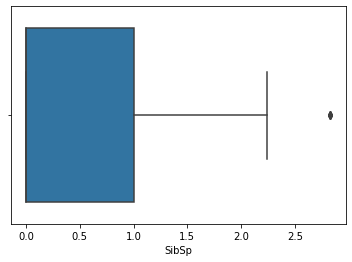

In [39]:
sns.boxplot(np.sqrt(df["SibSp"]))

<AxesSubplot:xlabel='SibSp'>

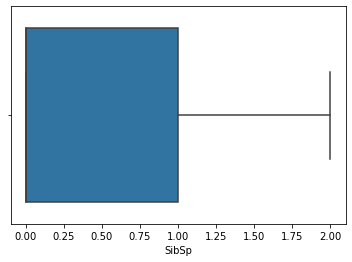

In [40]:
sns.boxplot(np.cbrt(df["SibSp"]))

In [41]:
df["SibSp"] = np.cbrt(df["SibSp"])#outlires handlrd by cuberoot

<AxesSubplot:xlabel='SibSp'>

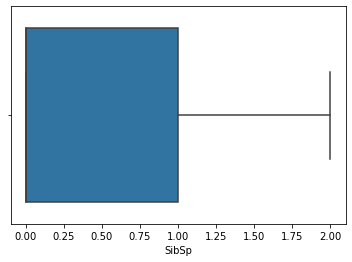

In [42]:
sns.boxplot(df["SibSp"])

<AxesSubplot:xlabel='Parch'>

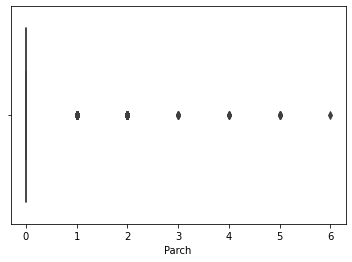

In [43]:
sns.boxplot(df["Parch"])

<AxesSubplot:xlabel='Parch'>

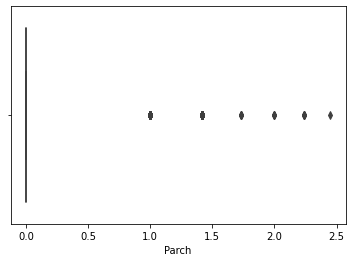

In [44]:
sns.boxplot(np.sqrt(df["Parch"]))

<AxesSubplot:xlabel='Parch'>

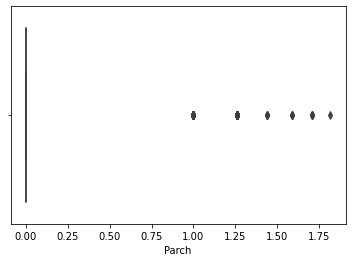

In [45]:
sns.boxplot(np.cbrt(df["Parch"]))

In [46]:
np.cbrt(df["Parch"]).describe()

count    891.000000
mean       0.272415
std        0.494092
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.817121
Name: Parch, dtype: float64

In [47]:
df['Parch'] = df['Parch'].replace(df['Parch'].max(),1.0)
df['Parch'] = df['Parch'].replace(df['Parch'].max(),1.0)
df['Parch'] = df['Parch'].replace(df['Parch'].max(),1.0)
df['Parch'] = df['Parch'].replace(df['Parch'].max(),1.0)
df['Parch'] = df['Parch'].replace(df['Parch'].max(),1.0)
df['Parch'] = df['Parch'].replace(df['Parch'].max(),1.0)

In [48]:
df['Parch'] = df['Parch'].replace(df['Parch'].max(),1.0)

<AxesSubplot:xlabel='Parch'>

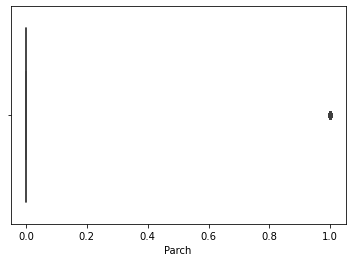

In [49]:
sns.boxplot(np.cbrt(df["Parch"]))

<AxesSubplot:xlabel='Fare'>

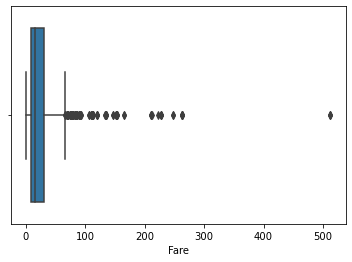

In [50]:
sns.boxplot(df["Fare"])

<AxesSubplot:xlabel='Fare'>

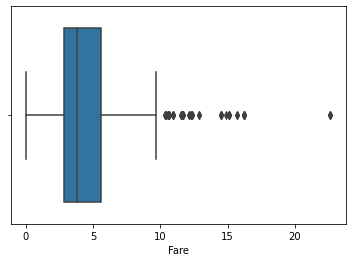

In [51]:
sns.boxplot(np.sqrt(df["Fare"]))

<AxesSubplot:xlabel='Fare'>

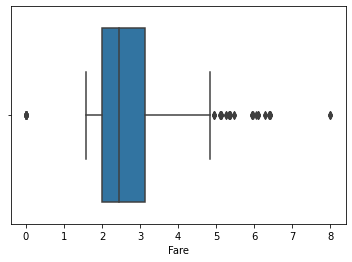

In [52]:
sns.boxplot(np.cbrt(df["Fare"]))

<AxesSubplot:xlabel='Fare'>

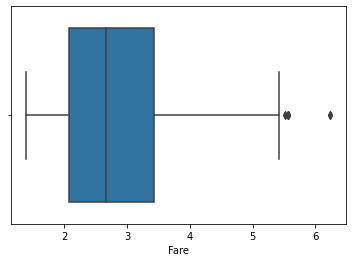

In [53]:
sns.boxplot(np.log(df["Fare"]))

In [54]:
np.log(df["Fare"]).describe()

count    891.000000
mean           -inf
std             NaN
min            -inf
25%        2.068177
50%        2.670985
75%        3.433987
max        6.238967
Name: Fare, dtype: float64

In [55]:
df["Survived"].value_counts() # Data is imbalanced..Scalling required

0    547
1    344
Name: Survived, dtype: int64

In [56]:
x = df.drop("Survived",axis=1)
y = df["Survived"]

In [57]:
smt = SMOTE(sampling_strategy=0.90, random_state=None, k_neighbors=5) #Using SMOTE technique for data balancing
x_sampled,y_sampled = smt.fit_resample(x,y)
y_sampled.value_counts()

0    547
1    492
Name: Survived, dtype: int64

## Train Test split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=42) 

# 80% data for traing,20% data for testing


## Model Training

## 1.Logistic Regression

In [59]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [60]:
y_pred = lr_model.predict(x_test)
y_pred[15:20]

array([0, 1, 0, 1, 0], dtype=int64)

In [61]:
y_test[15:20]

817    0
136    1
923    1
996    1
210    0
Name: Survived, dtype: int64

### Model Evaluation Logistic Regression

In [62]:
# Training Accuracy

y_pred_train = lr_model.predict(x_train)

cnf_matrix = multilabel_confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[[286 105]
  [ 90 350]]

 [[350  90]
  [105 286]]]
Accuracy : 0.7653429602888087
classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       440
           1       0.76      0.73      0.75       391

    accuracy                           0.77       831
   macro avg       0.76      0.76      0.76       831
weighted avg       0.77      0.77      0.77       831



In [63]:
#Testing accuracy

y_pred_test = lr_model.predict(x_test)

conf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:\n",conf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred_test)
print("classification report is: \n",clf_report)



Confusion Matrix:
 [[89 18]
 [24 77]]
Accuracy : 0.7980769230769231
classification report is: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       107
           1       0.81      0.76      0.79       101

    accuracy                           0.80       208
   macro avg       0.80      0.80      0.80       208
weighted avg       0.80      0.80      0.80       208



## 2. KNearest Neighbors Classification

<AxesSubplot:xlabel='Age', ylabel='Density'>

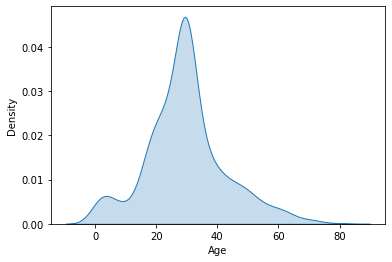

In [64]:
sns.kdeplot(df["Age"],fill=True)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

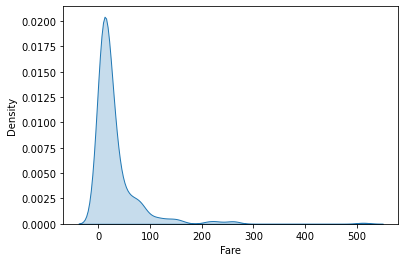

In [65]:
sns.kdeplot(df["Fare"],fill=True)

In [66]:
std_scalar = StandardScaler()
std_scalar.fit(x_train) # we are storing minimum and maximum values
array = std_scalar.transform(x_train)

std_train_xdf = pd.DataFrame(array,columns = x_train.columns )
std_train_xdf.head(3)

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,-1.516591,1.303093,0.248919,1.20274,-0.555573,0.360989,-0.556537
1,-0.324266,-0.767405,0.580068,1.20274,-0.555573,-0.144600,-0.556537
2,-0.324266,-0.767405,-0.649085,1.20274,-0.555573,-0.427215,-0.556537


In [67]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(std_train_xdf,y_train)

KNeighborsClassifier()

In [68]:
# Training data Evalutaion
y_pred_train = knn_clf.predict(std_train_xdf)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confision marix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy score is",accuracy)
print("*"*80)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report :\n",clf_report)

Confision marix :
 [[386  54]
 [ 78 313]]
********************************************************************************
Accuracy score is 0.8411552346570397
********************************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       440
           1       0.85      0.80      0.83       391

    accuracy                           0.84       831
   macro avg       0.84      0.84      0.84       831
weighted avg       0.84      0.84      0.84       831



In [69]:
array = std_scalar.transform(x_test)
std_test_df = pd.DataFrame(array,columns = x_test.columns)

In [70]:
# Testing data Evalution

y_pred = knn_clf.predict(std_test_df)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confision marix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy score is",accuracy)
print("*"*80)

clf_report = classification_report(y_test,y_pred)
print("Classification report :\n",clf_report)

Confision marix :
 [[90 17]
 [24 77]]
********************************************************************************
Accuracy score is 0.8028846153846154
********************************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       107
           1       0.82      0.76      0.79       101

    accuracy                           0.80       208
   macro avg       0.80      0.80      0.80       208
weighted avg       0.80      0.80      0.80       208



r2_train_list:
 [0.8965102286401926, 0.8748495788206979, 0.8495788206979543, 0.8399518652226233, 0.8315282791817088, 0.838748495788207, 0.8279181708784596, 0.8243080625752106, 0.8086642599277978, 0.8050541516245487, 0.8038507821901324, 0.7990373044524669, 0.8050541516245487, 0.802647412755716, 0.8050541516245487, 0.7954271961492179, 0.7966305655836342, 0.7870036101083032, 0.7870036101083032]

r2_test_list:
 [0.7788461538461539, 0.7884615384615384, 0.7884615384615384, 0.8125, 0.8076923076923077, 0.8125, 0.7788461538461539, 0.7884615384615384, 0.7740384615384616, 0.8028846153846154, 0.7740384615384616, 0.7884615384615384, 0.7932692307692307, 0.7884615384615384, 0.7932692307692307, 0.7692307692307693, 0.7884615384615384, 0.7740384615384616, 0.7740384615384616]


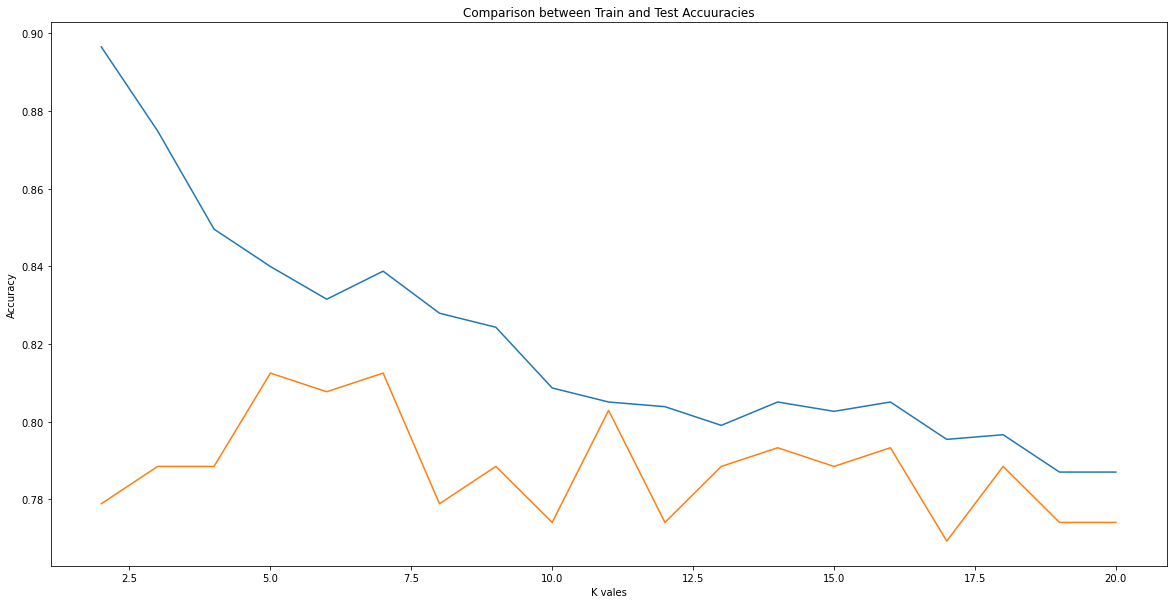

In [71]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsClassifier(n_neighbors=k,p=1)
    knn_reg.fit(std_train_xdf,y_train)
    r2_train = knn_reg.score(std_train_xdf,y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(std_test_df,y_test)
    r2_test_list.append(r2_test)
    
print("r2_train_list:\n",r2_train_list )
print()
print("r2_test_list:\n",r2_test_list)


plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K vales")
plt.ylabel("Accuracy")
plt.title("Comparison between Train and Test Accuuracies")
plt.savefig("K values comparision.jpeg")

In [73]:
knn_clf = KNeighborsClassifier(n_neighbors=6,p=1)
knn_clf.fit(std_train_xdf,y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [74]:
# Training data Evalutaion
y_pred_train = knn_clf.predict(std_train_xdf)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confision marix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy score is",accuracy)
print("*"*80)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report :\n",clf_report)

Confision marix :
 [[403  37]
 [103 288]]
********************************************************************************
Accuracy score is 0.8315282791817088
********************************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.80      0.92      0.85       440
           1       0.89      0.74      0.80       391

    accuracy                           0.83       831
   macro avg       0.84      0.83      0.83       831
weighted avg       0.84      0.83      0.83       831



In [75]:
# Testing data Evalution

y_pred = knn_clf.predict(std_test_df)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confision marix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy score is",accuracy)
print("*"*80)

clf_report = classification_report(y_test,y_pred)
print("Classification report :\n",clf_report)

Confision marix :
 [[96 11]
 [29 72]]
********************************************************************************
Accuracy score is 0.8076923076923077
********************************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       107
           1       0.87      0.71      0.78       101

    accuracy                           0.81       208
   macro avg       0.82      0.81      0.81       208
weighted avg       0.82      0.81      0.81       208



### Hyperparameter Tunning for KNN

In [76]:
knn_clf = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(3,20),
                  'p' :[1,2]}

gscv_knn_clf = GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(std_train_xdf, y_train)
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=12, p=1)

In [77]:
knn_clf = KNeighborsClassifier(n_neighbors=9,p=1)
knn_clf.fit(std_train_xdf,y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [78]:
# Training data Evalutaion
y_pred_train = knn_clf.predict(std_train_xdf)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confision marix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy score is",accuracy)
print("*"*80)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report :\n",clf_report)

Confision marix :
 [[386  54]
 [ 92 299]]
********************************************************************************
Accuracy score is 0.8243080625752106
********************************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       440
           1       0.85      0.76      0.80       391

    accuracy                           0.82       831
   macro avg       0.83      0.82      0.82       831
weighted avg       0.83      0.82      0.82       831



In [79]:
# Testing data Evalution

y_pred = knn_clf.predict(std_test_df)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confision marix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy score is",accuracy)
print("*"*80)

clf_report = classification_report(y_test,y_pred)
print("Classification report :\n",clf_report)

Confision marix :
 [[91 16]
 [28 73]]
********************************************************************************
Accuracy score is 0.7884615384615384
********************************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.76      0.85      0.81       107
           1       0.82      0.72      0.77       101

    accuracy                           0.79       208
   macro avg       0.79      0.79      0.79       208
weighted avg       0.79      0.79      0.79       208



# Decision Tree

In [80]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
#Testing Data Accurcay

y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[84 23]
 [30 71]]
Accuracy : 0.7451923076923077
classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76       107
           1       0.76      0.70      0.73       101

    accuracy                           0.75       208
   macro avg       0.75      0.74      0.74       208
weighted avg       0.75      0.75      0.74       208



In [82]:
#Training Data Accurcay

y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[439   1]
 [ 11 380]]
Accuracy : 0.9855595667870036
classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       440
           1       1.00      0.97      0.98       391

    accuracy                           0.99       831
   macro avg       0.99      0.98      0.99       831
weighted avg       0.99      0.99      0.99       831



### Fetaure Selection - Embedded Method

In [83]:
array = dt_clf.feature_importances_
array

array([0.11958986, 0.22364266, 0.28410374, 0.05026227, 0.01985735,
       0.2837637 , 0.01878043])

<AxesSubplot:>

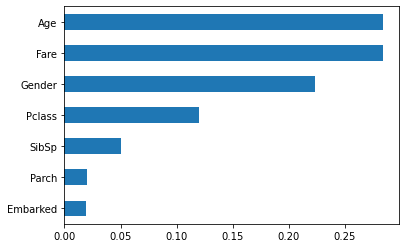

In [84]:
s1 = pd.Series(array,index = x.columns)
s1.sort_values().plot(kind = "barh")

### Hyperparameter Tuning

In [85]:
dt_clf = DecisionTreeClassifier()

hyperparameter = {"criterion":['gini',"entropy"],
    "max_depth":np.arange(3,8),
    "min_samples_split":np.arange(2,20),
    "min_samples_leaf":np.arange(2,15)}

rndcv_dt_clf = RandomizedSearchCV(dt_clf,hyperparameter,cv = 5)
rndcv_dt_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [86]:
rndcv_dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, min_samples_split=7)

In [87]:
#Training Data evaluation after Hyperparameter Tuning

#dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=11)

dt_clf = rndcv_dt_clf.best_estimator_

y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[391  49]
 [131 260]]
Accuracy : 0.7833935018050542
classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81       440
           1       0.84      0.66      0.74       391

    accuracy                           0.78       831
   macro avg       0.80      0.78      0.78       831
weighted avg       0.79      0.78      0.78       831



In [88]:
#Testing Data evaluation after Hyperparameter Tuning


y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[99  8]
 [36 65]]
Accuracy : 0.7884615384615384
classification Report:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       107
           1       0.89      0.64      0.75       101

    accuracy                           0.79       208
   macro avg       0.81      0.78      0.78       208
weighted avg       0.81      0.79      0.78       208



### Pruning

In [89]:
result = dt_clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list=list(ccp_alpha_list)

In [90]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    #print(ccp_alpha)
    dt_clf = DecisionTreeClassifier(random_state=10,ccp_alpha=ccp_alpha)
    dt_clf.fit(x_train,y_train)
    train_accuracy_list.append(dt_clf.score(x_train,y_train))
    test_accuracy_list.append(dt_clf.score(x_test,y_test))
    
print(train_accuracy_list)
print(test_accuracy_list)

[0.9855595667870036, 0.9855595667870036, 0.7785800240673887, 0.7545126353790613, 0.7545126353790613, 0.7316486161251504, 0.7316486161251504, 0.529482551143201]
[0.7596153846153846, 0.7548076923076923, 0.7884615384615384, 0.7067307692307693, 0.7067307692307693, 0.6923076923076923, 0.7692307692307693, 0.5144230769230769]


In [91]:
ccp_alpha_list

[0.0,
 0.00034190327511625894,
 0.008035402352393153,
 0.013210230497881212,
 0.01496907903515507,
 0.02094589918829723,
 0.03920796411771142,
 0.10757124097245652]

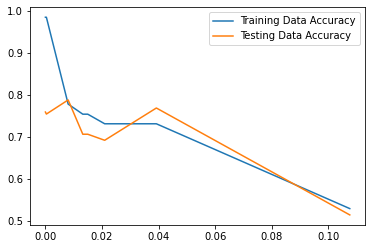

In [92]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list,train_accuracy_list,label= "Training Data Accuracy")
ax.plot(ccp_alpha_list,test_accuracy_list,label = "Testing Data Accuracy")
ax.legend()

In [93]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([2], dtype=int64),)

In [95]:
test_accuracy_list[2]

0.7884615384615384

In [96]:
train_accuracy_list[2]

0.7785800240673887

In [98]:
ccp_alpha_list[2]

0.008035402352393153

In [100]:
decision_tree_model = DecisionTreeClassifier(random_state=10,ccp_alpha=ccp_alpha_list[2])
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.008035402352393153, random_state=10)

In [101]:
#Testing Data Accurcay

y_pred = decision_tree_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[98  9]
 [35 66]]
Accuracy : 0.7884615384615384
classification Report:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82       107
           1       0.88      0.65      0.75       101

    accuracy                           0.79       208
   macro avg       0.81      0.78      0.78       208
weighted avg       0.81      0.79      0.78       208



In [102]:
#Training Data Accurcay

y_pred_train = decision_tree_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[385  55]
 [129 262]]
Accuracy : 0.7785800240673887
classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       440
           1       0.83      0.67      0.74       391

    accuracy                           0.78       831
   macro avg       0.79      0.77      0.77       831
weighted avg       0.79      0.78      0.78       831



# Random Forest

In [104]:
rf_model = RandomForestClassifier(oob_score=True)
rf_model.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [105]:
#Training Data Evaluation

y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[436   4]
 [  8 383]]
********************************************************************************
Accuracy : 0.9855595667870036
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       440
           1       0.99      0.98      0.98       391

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



In [106]:
#Testing Data Evaluation

y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[92 15]
 [24 77]]
Accuracy : 0.8125
classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83       107
           1       0.84      0.76      0.80       101

    accuracy                           0.81       208
   macro avg       0.82      0.81      0.81       208
weighted avg       0.81      0.81      0.81       208



# Random forest Hyperparameter Tuning

In [107]:
rf_model = RandomForestClassifier(oob_score=True)

hyperparameters = {'n_estimators':np.arange(10,100),
                    'criterion':['gini','entropy'],
                    'max_depth':np.arange(3,8),  
                    'min_samples_split':np.arange(4,20),
                    'min_samples_leaf':np.arange(3,10),
                    'random_state':[11]
                   }

rscv_rf_model = RandomizedSearchCV(rf_model,hyperparameters,cv = 7) 
rscv_rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(oob_score=True),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                        'random_state': [11]})

In [108]:
rscv_rf_model.best_estimator_  

RandomForestClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=54, oob_score=True, random_state=11)

In [109]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=54, oob_score=True, random_state=11)

In [110]:
#Training Data Evaluation

y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[391  49]
 [116 275]]
********************************************************************************
Accuracy : 0.8014440433212996
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       440
           1       0.85      0.70      0.77       391

    accuracy                           0.80       831
   macro avg       0.81      0.80      0.80       831
weighted avg       0.81      0.80      0.80       831



In [111]:
#Testing Data Evaluation

y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[94 13]
 [31 70]]
Accuracy : 0.7884615384615384
classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       107
           1       0.84      0.69      0.76       101

    accuracy                           0.79       208
   macro avg       0.80      0.79      0.79       208
weighted avg       0.80      0.79      0.79       208



In [112]:
x.columns

Index(['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [113]:
rf_model.feature_importances_

array([0.17709798, 0.38473337, 0.08955893, 0.07639963, 0.02924069,
       0.20230046, 0.04066893])

In [114]:
s1 = pd.Series(rf_model.feature_importances_,index = x.columns)
s1.sort_values()

Parch       0.029241
Embarked    0.040669
SibSp       0.076400
Age         0.089559
Pclass      0.177098
Fare        0.202300
Gender      0.384733
dtype: float64

<AxesSubplot:>

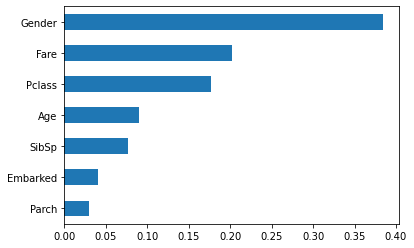

In [115]:
s1.sort_values().plot(kind = "barh")

In [116]:
rf_model.oob_score

True

In [117]:
rf_model.oob_score_

0.7821901323706378

# Adaboost

In [118]:
adb_clf = AdaBoostClassifier()
adb_clf.fit(x_train,y_train)

AdaBoostClassifier()

In [119]:
#Testing Data Evaluation

y_pred = adb_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("*"*80)

clf_report = classification_report(y_test,y_pred)
print('classification_report',clf_report)

Confusion Matrix :
 [[86 21]
 [23 78]]
********************************************************************************
Accuracy: 0.7884615384615384
********************************************************************************
classification_report               precision    recall  f1-score   support

           0       0.79      0.80      0.80       107
           1       0.79      0.77      0.78       101

    accuracy                           0.79       208
   macro avg       0.79      0.79      0.79       208
weighted avg       0.79      0.79      0.79       208



In [120]:
#Training Data Evaluation

y_pred_train = adb_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)
print("*"*80)

clf_report = classification_report(y_train,y_pred_train)
print('classification_report',clf_report)

Confusion Matrix :
 [[365  75]
 [ 90 301]]
********************************************************************************
Accuracy: 0.8014440433212996
********************************************************************************
classification_report               precision    recall  f1-score   support

           0       0.80      0.83      0.82       440
           1       0.80      0.77      0.78       391

    accuracy                           0.80       831
   macro avg       0.80      0.80      0.80       831
weighted avg       0.80      0.80      0.80       831



### Hyperparameter Tuning

In [121]:
adb_clf = AdaBoostClassifier(random_state=23)
hyperparameters = {'n_estimators':np.arange(10,100),
                    'learning_rate':np.arange(0,2,0.001)}
                   
rscv_adb_clf = RandomizedSearchCV(adb_clf,hyperparameters,cv = 4)
rscv_adb_clf.fit(x_train,y_train)
                   

RandomizedSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=23),
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [122]:
rscv_adb_clf.best_estimator_

AdaBoostClassifier(learning_rate=1.433, n_estimators=94, random_state=23)

In [123]:
adb_clf = rscv_adb_clf.best_estimator_

adb_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1.433, n_estimators=94, random_state=23)

In [124]:
#Testing Data Evaluation
y_pred = adb_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("*"*80)

clf_report = classification_report(y_test,y_pred)
print('classification_report',clf_report)


Confusion Matrix :
 [[92 15]
 [17 84]]
********************************************************************************
Accuracy: 0.8461538461538461
********************************************************************************
classification_report               precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.85      0.83      0.84       101

    accuracy                           0.85       208
   macro avg       0.85      0.85      0.85       208
weighted avg       0.85      0.85      0.85       208



In [125]:
#Training Data Evaluation
start_time = time.time() 

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)
print("*"*80)

clf_report = classification_report(y_train,y_pred_train)
print('classification_report',clf_report)


Confusion Matrix :
 [[365  75]
 [ 90 301]]
********************************************************************************
Accuracy: 0.8014440433212996
********************************************************************************
classification_report               precision    recall  f1-score   support

           0       0.80      0.83      0.82       440
           1       0.80      0.77      0.78       391

    accuracy                           0.80       831
   macro avg       0.80      0.80      0.80       831
weighted avg       0.80      0.80      0.80       831



## Gaussian Naive Bayes Classifier

In [126]:
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)

GaussianNB()

In [127]:
#Testing Data Evaluation

y_pred = nb_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("*"*80)

clf_report = classification_report(y_test,y_pred)
print('classification_report',clf_report)

Confusion Matrix :
 [[89 18]
 [33 68]]
********************************************************************************
Accuracy: 0.7548076923076923
********************************************************************************
classification_report               precision    recall  f1-score   support

           0       0.73      0.83      0.78       107
           1       0.79      0.67      0.73       101

    accuracy                           0.75       208
   macro avg       0.76      0.75      0.75       208
weighted avg       0.76      0.75      0.75       208



In [128]:
#Training Data Evaluation

y_pred_train = nb_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)
print("*"*80)

clf_report = classification_report(y_train,y_pred_train)
print('classification_report',clf_report)

Confusion Matrix :
 [[362  78]
 [144 247]]
********************************************************************************
Accuracy: 0.7328519855595668
********************************************************************************
classification_report               precision    recall  f1-score   support

           0       0.72      0.82      0.77       440
           1       0.76      0.63      0.69       391

    accuracy                           0.73       831
   macro avg       0.74      0.73      0.73       831
weighted avg       0.74      0.73      0.73       831



## XGBoost

In [129]:
x_train_xg = np.array(x_train)
y_train_xg = np.array(y_train)

In [131]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train_xg,y_train_xg)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [133]:
# Training Data Evaluation
y_pred_train = xgb_clf.predict(x_train_xg)

cnf_matrix = confusion_matrix(y_train_xg,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train_xg,y_pred_train)
print("Accuracy:",accuracy)
print("*"*80)

clf_report = classification_report(y_train_xg,y_pred_train)
print('classification_report',clf_report)

Confusion Matrix :
 [[432   8]
 [ 14 377]]
********************************************************************************
Accuracy: 0.97352587244284
********************************************************************************
classification_report               precision    recall  f1-score   support

           0       0.97      0.98      0.98       440
           1       0.98      0.96      0.97       391

    accuracy                           0.97       831
   macro avg       0.97      0.97      0.97       831
weighted avg       0.97      0.97      0.97       831



In [135]:
# Testing Data Evaluation
y_pred = xgb_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("*"*80)

clf_report = classification_report(y_test,y_pred)
print('classification_report',clf_report)

Confusion Matrix :
 [[92 15]
 [23 78]]
********************************************************************************
Accuracy: 0.8173076923076923
********************************************************************************
classification_report               precision    recall  f1-score   support

           0       0.80      0.86      0.83       107
           1       0.84      0.77      0.80       101

    accuracy                           0.82       208
   macro avg       0.82      0.82      0.82       208
weighted avg       0.82      0.82      0.82       208



### Hyper parameter tuning XGBoost DT

In [136]:
xgb_clfhp = XGBClassifier()

hyperparameter = {
    "max_depth": [3, 4, 5,6],
    'objective':['reg:squarederror'],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.7],
}
rscv_xgb_clf = RandomizedSearchCV(xgb_clfhp,hyperparameter,n_jobs=-1,cv = 6,scoring='neg_mean_squared_error')
rscv_xgb_clf.fit(x_train_xg,y_train_xg)

RandomizedSearchCV(cv=6,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7],
                                        'gamma': [0, 0.25, 1],
                                        'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': [3, 4, 5, 6],
                                        'objective': ['reg:squarederror'],
                                        'reg_lambda': [0, 1, 10],
                                        'scale_pos_weight': [1, 3, 5],
                                        'subsample': [0.8]},
                   scoring='neg_mean_squared_error')

In [137]:
rscv_xgb_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.25, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='reg:squarederror',
              predictor='auto', ...)

In [138]:
rscv_xgb_clf.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 1,
 'reg_lambda': 0,
 'objective': 'reg:squarederror',
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.25,
 'colsample_bytree': 0.7}

In [139]:
xgb_clfhp = rscv_xgb_clf.best_estimator_
xgb_clfhp.fit(x_train_xg,y_train_xg)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.25, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='reg:squarederror',
              predictor='auto', ...)

In [140]:
# Training Data Evaluation
y_pred_train = xgb_clfhp.predict(x_train_xg)

cnf_matrix = confusion_matrix(y_train_xg,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train_xg,y_pred_train)
print("Accuracy:",accuracy)
print("*"*80)

clf_report = classification_report(y_train_xg,y_pred_train)
print('classification_report',clf_report)

Confusion Matrix :
 [[428  12]
 [ 49 342]]
********************************************************************************
Accuracy: 0.9265944645006017
********************************************************************************
classification_report               precision    recall  f1-score   support

           0       0.90      0.97      0.93       440
           1       0.97      0.87      0.92       391

    accuracy                           0.93       831
   macro avg       0.93      0.92      0.93       831
weighted avg       0.93      0.93      0.93       831



In [141]:
# Testing Data Evaluation
y_pred = xgb_clfhp.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("*"*80)

clf_report = classification_report(y_test,y_pred)
print('classification_report',clf_report)

Confusion Matrix :
 [[100   7]
 [ 25  76]]
********************************************************************************
Accuracy: 0.8461538461538461
********************************************************************************
classification_report               precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.92      0.75      0.83       101

    accuracy                           0.85       208
   macro avg       0.86      0.84      0.84       208
weighted avg       0.86      0.85      0.84       208



<h3>Now Lets choose which model is useful to use for making API</h3>

In [149]:
d1=["Logistic","KNN","Decision Tree","Random Forest","AdaBoost","XGBoost"]
d2=["Testing Accuracy","Training Accuracy","Variance"]

In [150]:
d1={'Algorithm':["Linear","KNN","Decision Tree","Random Forest","AdaBoost","Gaussian Naive Bayes Classifier","XGBoost"],
    "Training Accuracy":[76.53,84.11,77.85,98.55,80.14,73.28,97.35],
    "Testing Accuracy" :[79.80,80.28,78.84,81.25,84.61,75.48,81.73],
     "Variance":[3.26,3.82,0.99,17.29,4.46,2.20,15.61]}
df=pd.DataFrame(d1)
df

,Algorithm,Training Accuracy,Testing Accuracy,Variance
0,Linear,76.53,79.80,3.26
1,KNN,84.11,80.28,3.82
2,Decision Tree,77.85,78.84,0.99
3,Random Forest,98.55,81.25,17.29
4,AdaBoost,80.14,84.61,4.46
5,Gaussian Naive Bayes Classifier,73.28,75.48,2.20
6,XGBoost,97.35,81.73,15.61


### Final Model Decision Tree

In [151]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=14,min_samples_split=6)

In [152]:
#Training Data evaluation after Hyperparameter Tuning

dt_clf = rndcv_dt_clf.best_estimator_

y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[391  49]
 [131 260]]
Accuracy : 0.7833935018050542
classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81       440
           1       0.84      0.66      0.74       391

    accuracy                           0.78       831
   macro avg       0.80      0.78      0.78       831
weighted avg       0.79      0.78      0.78       831



In [153]:
#Testing Data evaluation after Hyperparameter Tuning

y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[99  8]
 [36 65]]
Accuracy : 0.7884615384615384
classification Report:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       107
           1       0.89      0.64      0.75       101

    accuracy                           0.79       208
   macro avg       0.81      0.78      0.78       208
weighted avg       0.81      0.79      0.78       208



### Creating pikle file

In [154]:
with open("DT_Classifier.pkl","wb") as f:
    pickle.dump(dt_clf,f)

In [157]:
project_data = {"Gender": {'male':0, 'female':1},
                  "Embarked":{'S':0, 'C':1, 'Q':2},
                     'columns': list(x.columns)
                      }

In [158]:
with open("project_data.json","w") as f:
    json.dump(project_data,f)